##Mount Drive. 
You will be asked to authenticate.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Iteratively call !ls "filepath" until finding the correct filepath for this folder. If you have Field Day added to "My Drive", the path should be the same.

In [9]:
!ls '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/data/Clusters'

clustering_DecJan_lvl0-1_buys_pca2k4_20200212.csv
clustering_DecJan_sess_achs_pca2k4_20200212.csv
clustering_DecJan_sess_feedback_pca2k4_20200218.csv
clustering_Nov25_lvl0-1_buys_pca2k4_20200212.csv
clustering_Nov25_lvl0-2_buys_pca2k4_20200212.csv
clustering_Nov25_sess_ach_pca2k4_20200212.csv
clustering_Nov25_sess_feedback_pca2k4_20200218.csv
clustering_Nov25_XXX_buys_pca2k4_20200212.gsheet
old


In [0]:
# !ls "/content/drive"
import os
cluster_folder = '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/data/Clusters'
graph_folder = '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/Graphs'
graph_fpath = data_fpath = lambda fname: os.path.join(graph_folder, fname)
data_fpath = lambda fname: os.path.join(cluster_folder, fname)
cluster_path = data_fpath('clustering_DecJan_sess_feedback_pca2k4_20200218.csv')
# cluster_path = "/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/data/Clusters/cluster_export.csv"

## Set Vars (add in a list of categories name for radial chart if desired!)

In [0]:
#@markdown 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
categories = []
colors = {i:v for i,v in enumerate(plt.cm.get_cmap('tab10').colors)}
## categories=['buy_hovers','buy_home','buy_farm','buy_livestock','total_buys']
# categories=['buy_home','buy_farm','buy_livestock','buy_fertilizer','avg_hovers_b4_farm']
# categories = ['pop','farm','money','bloom']

## Import DataFrame

In [12]:

df = pd.read_csv(cluster_path, index_col=[0,1])
df.head()

,,sess_count_food_produced,sess_count_milk_produced,sess_count_achievements,sess_count_deaths,sess_count_blooms,label
sessID,num_play,,,,,,
19110002150060536,1,8,0,3,2,0,2
19110007194177108,1,8,0,3,2,0,2
19110008292229944,1,26,1,4,2,2,1
19110009364430810,2,26,0,4,2,0,1
19110009492236160,1,12,0,3,2,0,2


## Show some stats.

In [13]:
stddev_df = pd.DataFrame()
clusters = set(df['label'])
for c in clusters:
  cluster_df = df[df['label']==c]
  stddev_df[f'C{c}'] = cluster_df.describe().loc['std',:]
stddev_df

,C0,C1,C2,C3
sess_count_food_produced,4.987730,640.075524,6.496732,3.967753
sess_count_milk_produced,0.168644,158.902264,0.110637,0.000000
sess_count_achievements,0.458850,2.240380,0.724872,0.542632
sess_count_deaths,0.117291,2.159672,0.331533,0.486023
sess_count_blooms,0.000000,2.205157,0.000000,0.000000
label,0.000000,0.000000,0.000000,0.000000


In [14]:
count_df = pd.DataFrame()
clusters = set(df['label'])
for c in clusters:
  cluster_df = df[df['label']==c]
  count_df[f'C{c}'] = cluster_df.describe().loc['count',:]
count_df

,C0,C1,C2,C3
sess_count_food_produced,2868.0,4677.0,1534.0,1414.0
sess_count_milk_produced,2868.0,4677.0,1534.0,1414.0
sess_count_achievements,2868.0,4677.0,1534.0,1414.0
sess_count_deaths,2868.0,4677.0,1534.0,1414.0
sess_count_blooms,2868.0,4677.0,1534.0,1414.0
label,2868.0,4677.0,1534.0,1414.0


In [15]:
full_df = df.describe()
full_df

,sess_count_food_produced,sess_count_milk_produced,sess_count_achievements,sess_count_deaths,sess_count_blooms,label
count,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000
mean,67.982083,9.208711,3.609930,1.066806,0.346040,1.142381
std,432.396428,106.575211,2.008048,1.614666,1.521874,0.968690
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,3.000000,1.000000,0.000000,1.000000
75%,32.000000,1.000000,4.000000,2.000000,0.000000,2.000000
max,18828.000000,5079.000000,16.000000,50.000000,57.000000,3.000000


In [16]:
summary_df = pd.DataFrame(columns=full_df.columns)
clusters = set(df['label'])
for c in clusters:
  cluster_df = df[df['label']==c].describe()
  summary_df.loc[f'C{c}_zscore',:] = (cluster_df.loc['mean',:] - full_df.loc['mean',:]) / full_df.loc['std',:]
  summary_df.loc[f'C{c}_%mean',:] = (cluster_df.loc['mean',:] / full_df.loc['mean',:])*100
  summary_df.loc[f'C{c}_%std',:] = (cluster_df.loc['std',:] / full_df.loc['std',:])*100
summary_df = summary_df.apply(lambda x: (x*100)//1*.01)
summary_df
# summary_df.reindex([(f'C{c}',s) for c in clusters for s in ['zscore','%mean','%clusters']])

,sess_count_food_produced,sess_count_milk_produced,sess_count_achievements,sess_count_deaths,sess_count_blooms,label
C0_zscore,-0.14,-0.09,-0.72,-0.66,-0.23,-1.18
C0_%mean,11.55,0.31,60.45,1.3,0,0
C0_%std,1.15,0.15,22.85,7.26,0,0
C1_zscore,0.17,0.1,0.67,0.14,0.28,-0.15
C1_%mean,208.29,224.11,137.62,121.93,224.35,87.53
C1_%std,148.02,149.09,111.57,133.75,144.89,0
C2_zscore,-0.13,-0.09,-0.14,0.59,-0.23,0.88
C2_%mean,17.33,0.13,92.71,190.4,0,175.07
C2_%std,1.5,0.1,36.09,20.53,0,0
C3_zscore,-0.15,-0.09,-0.66,0.19,-0.23,1.91


## Scatter Plot

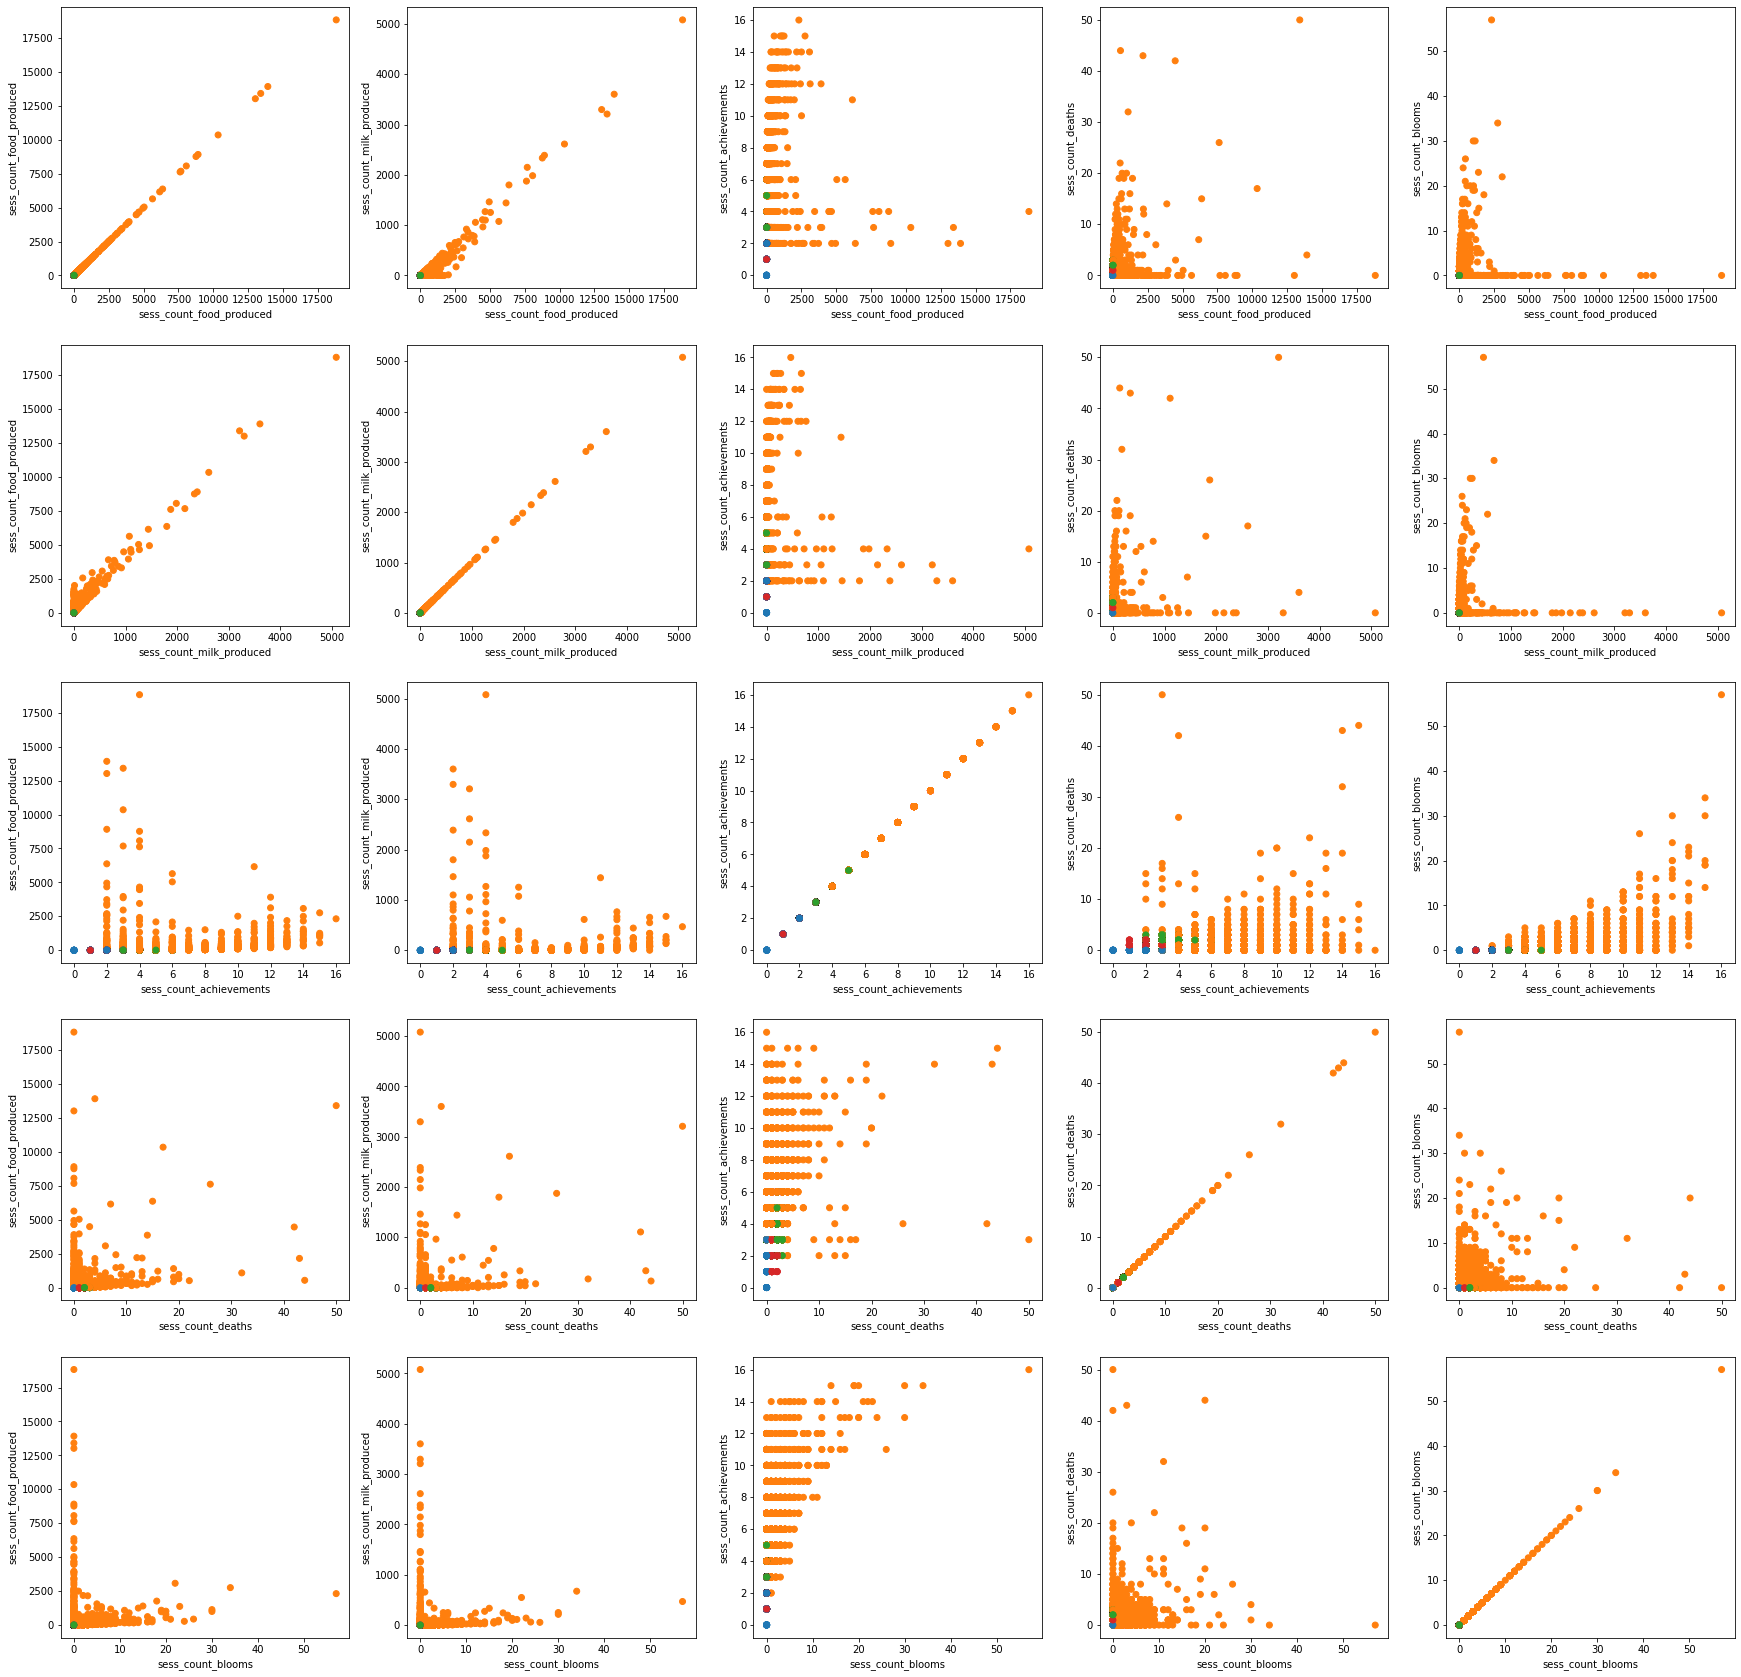

In [21]:
num_cols = len(df.columns) - 1
color_array = [colors[c] for c in df['label']]
fig, axs = plt.subplots(num_cols,num_cols,figsize=(30,30))
for x in range(num_cols):
  for y in range(num_cols):
    axs[x,y].scatter(df.iloc[:,x],df.iloc[:,y],c=color_array)
    axs[x,y].set_xlabel(df.columns[x])
    axs[x,y].set_ylabel(df.columns[y])

In [0]:
# fig.savefig(graph_fpath('PCA2 KMeans4 achs_per_second scatter'))

[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0] [-0.14, -0.09, -0.72, -0.66, -0.23, -0.14]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0] [0.17, 0.1, 0.67, 0.14, 0.28, 0.17]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0] [-0.13, -0.09, -0.14, 0.59, -0.23, -0.13]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0] [-0.15, -0.09, -0.66, 0.19, -0.23, -0.15]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0] [11.55, 0.31, 60.45, 1.3, 0.0, 11.55]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0] [208.29, 224.11, 137.62, 121.93, 224.35, 208.29]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0] [17.330000000000002, 0.13, 92.71000000000001, 190.4, 0.0, 17.330000000000002]
[0.0, 1.2566370614359172, 2.51327412287183

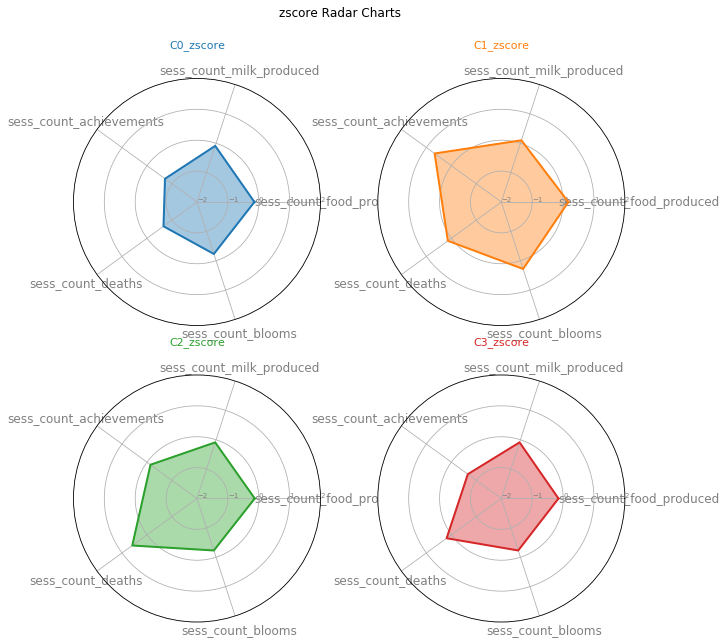

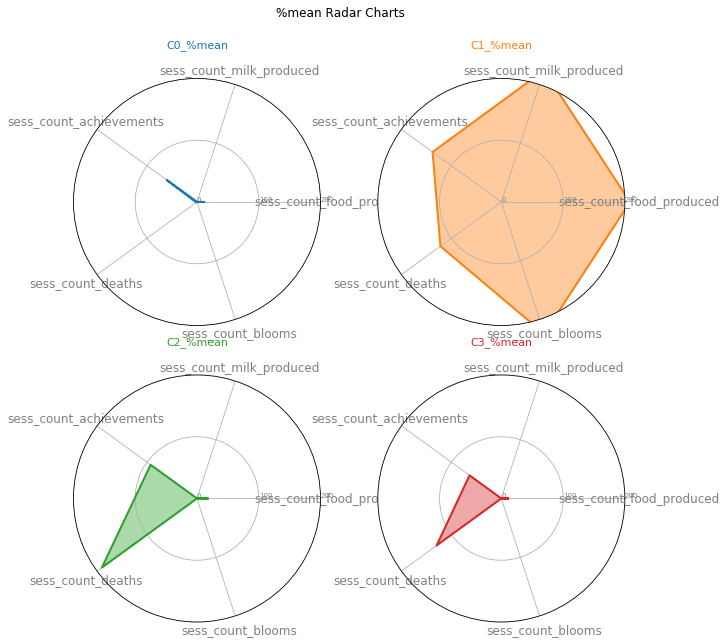

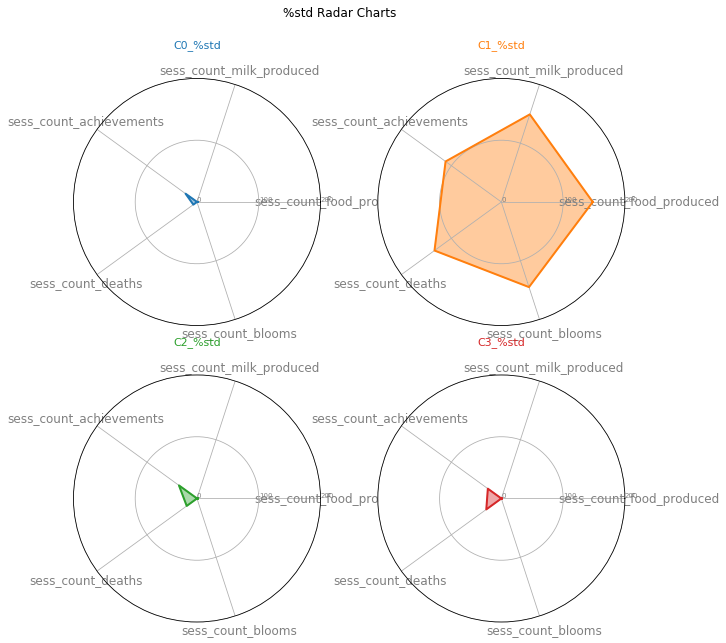

In [23]:
def make_spider(color,i):
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
  ax = plt.subplot(nrows,ncols,i+1, polar=True)
  plt.xticks(angles[:-1], categories, color='grey', size=12)
  ax.set_rlabel_position(0)
  if var == 'zscore':
    plt.yticks([-2,-1,0,1,2], color="grey", size=7)
    plt.ylim(-2,2)
  elif '%' in var:
    plt.yticks(range(0,500,100),color="grey", size=7)
    plt.ylim(0,200)
  values = list(tdf.iloc[i,:-1])
  values += values[:1]
  graph_name = tdf.index[i]
  print(angles,values)
  ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
  ax.fill(angles, values, color=color, alpha=0.4)
  plt.title(graph_name, size=11, color=color, y=1.1)

# number of variable
for var in ['zscore', '%mean','%std']:
  tdf = summary_df.loc[[idx for idx in summary_df.index if var in idx],:]
  if not categories:
    categories = list(tdf.drop('label',axis=1).columns)
  N = len(categories)
  num_groups = len(tdf.index)
  nrows = 2
  ncols = num_groups//2 if not num_groups%2 else num_groups//2 + 1
  fig = plt.figure(figsize=(10,10))
  fig.suptitle(f'{var} Radar Charts')
  for i in range(num_groups):
    make_spider(colors[i],i)
  

### Look at correlations to other features
#### Upload full df

In [0]:
import urllib
from zipfile import ZipFile
from io import BytesIO
proc_zip_url_dec = 'https://github.com/fielddaylab/opengamedata/blob/master/jupyter/lakeland_data/LAKELAND_20191201_to_20191231_b2cf46d_proc.zip?raw=true'
proc_zip_path_jan = '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 Lakeland EDM/jupyter/data/input/LAKELAND_20200101_to_20200131_a9720c1_proc.zip'
resp = urllib.request.urlopen(proc_zip_url_dec)
zipfile_dec = ZipFile(BytesIO(resp.read()))
zipfile_jan = ZipFile(proc_zip_path_jan)
full_df = pd.DataFrame()
for zf in [zipfile_dec, zipfile_jan]:
  with zf.open(zf.namelist()[0]) as f:
      full_df = pd.concat([full_df,pd.read_csv(f,index_col=['sessID','num_play'])])

In [0]:
full_df.shape
#sorted(full_df.index,key = lambda x: x[0])



In [0]:
from datetime import date
def full_df_histogram(fname, xlabel=None, suptitle=None,savefig=False,
                      savefig_prefix='',save_format='png',bins=50, **kwargs):
  xlabel = xlabel or fname
  suptitle = suptitle or f'{fname} Histograms by Cluster'
  df_with_feature = df.join(full_df[fname])
  fig,axes = plt.subplots(1,4,True,True,figsize=(20,5))
  fig.suptitle(suptitle)

  for c,ax in zip(clusters,axes):
    points = df_with_feature.loc[df_with_feature['label']==c,fname]
    ax.hist(points,color=colors[c],bins=bins,**kwargs)
    ax.set_ylabel('Num Players')
    ax.set_title(f'C{c} n={len(points)}')
    ax.set_xlabel(xlabel)
  if savefig:
    savefig_prefix = date.today().strftime("%Y%m%d")+'_'+savefig_prefix+'_'
    savepath = graph_fpath(savefig_prefix+suptitle+'.'+save_format)
    if os.path.isfile(savepath):
      print('Image already exsits! '+savepath)
    else:
      fig.savefig(savepath, format=save_format)

In [0]:
full_df_histogram('sessDuration',savefig=True, savefig_prefix='achs_per_sec_clusters (w sample sizes)')

In [0]:
list([x for x in full_df.columns if 'death' in x])

In [0]:
full_df_histogram('sess_time_to_death_tutorial',savefig=True, savefig_prefix='achs_per_sec_clusters',range=(1,3000))

In [0]:
full_df_histogram('sess_time_to_another_death_tutorial',savefig=True, savefig_prefix='achs_per_sec_clusters',range=(1,3000))

In [0]:
full_df_histogram('sess_ActiveEventCount',savefig=True, savefig_prefix='achs_per_sec_clusters',range=(0,1000))

In [0]:
def create_new_base_features(df):
  time_to_ach = lambda ach: f'sess_time_to_{ach}_achievement'
  pop_achs = ['exist','group','town','city']
  farm_achs = ['farmer','farmers','farmtown','megafarm']
  money_achs = ['paycheck','thousandair','stability','riches']
  bloom_achs = ['bloom','bigbloom','hugebloom','massivebloom']
  df['count_pop_achs'] = df[[time_to_ach(ach) for ach in pop_achs]].astype(bool).sum(axis=1)
  df['count_farm_achs'] = df[[time_to_ach(ach) for ach in farm_achs]].astype(bool).sum(axis=1)
  df['count_money_achs'] = df[[time_to_ach(ach) for ach in money_achs]].astype(bool).sum(axis=1)
  df['count_bloom_achs'] = df[[time_to_ach(ach) for ach in bloom_achs]].astype(bool).sum(axis=1)
  for ach_type in ['pop','farm','money','bloom']:
    df[f'{ach_type}_achs_per_second'] = df[f'count_{ach_type}_achs'] / df['sessDuration']
  return df
full_df = create_new_base_features(full_df)

In [0]:
for ach_type in ['pop','farm','money','bloom']:
  full_df_histogram(f'count_{ach_type}_achs',bins=[-.5,.5,1.5,2.5,3.5,4.5], savefig=True, savefig_prefix='achs_per_sec_clusters' )

In [0]:
full_df['sessDuration'].hist(range=(300,3000),bins=50)
plt.savefig(graph_fpath('session durations hist jan-dec, range(300,3000)'))